# Perspektiva - měření vzdálenosti v obraze
Cvičení je velmi krátké a jednoduché. Nicméně, je prerekvizitou k úspěšnému absolvování druhého domácího úkolu. 

S tématem měření vzdáleností v obraze jsme se setkali již ve 4. cvičení. Připomeňme si však, jakým způsobem jsme problém řešili. Využívali jsme znalosti poměru px/mm. Tento způsob měl jednu velkou nevýhodu, neboť když se nebude obrazová rovina nacházet rovnoběžně se snímanou rovinou, poměr px/mm nebude dávat smysl a budeme dostávat chybné výsledky.

Tento problém vyřešíme znalostí perspektivy, konkrétně aplikací 2D perspektivní transformace (viz přednáška [Geometrické transformace obrazu](../../../lectures/files/bi-svz-06-metody-predzpracovani-obrazu-1.pdf) - homography). Představme si nyní obrázek, na kterém chceme zjistit skutečnou vzdálenost dvou bodů označených úsečkou **`d`**  v milimetrech.

![](images/pattern_measuring.jpg)

Na první pohled je jasné, že počítat poměr px/mm v tomto obraze je nesmyslné. Obraz je perspektivně zkreslený - kruhy se změnily na elipsy a obdélníky se staly lichoběžníky. Se znalostí toho, jak vypadaly původní tvary v obraze, a jaké byly jejich původní rozměry, jsme schopni papír se vzory geometricky transformovat do tvaru "kolmého k obrazové rovině". Navíc, nejenže známe velikosti referenčního oranžového obdélníku, ale známe také velikosti klasického A4 papíru (210 x 297 mm). Informace o rozměrech a tvaru papíru nám stačí k tomu, vypočítat transformační matici **`H`**, která každý pixel dokáže převést do nového "narovnaného" obrazu.

![](images/pattern_measuring_warped.jpg)

Pokud si v rámci této transformace ještě navíc zvolíme chytré jednotky. Výsledné vzdálenosti v pixelech budou odpovídat přímo vzdálenostem v mm nebo v čemkoliv jiném.

## Pomocné funkce

Seznam funkcí pro přehlednost:

- [`show_images`](https://gitlab.fit.cvut.cz/bi-svz/improutils_package/blob/master/improutils/visualisation/visualisation.py#L55)

### Import knihoven a konfigurace

In [1]:
import os
import io

import cv2
import numpy as np
import matplotlib.pyplot as plt

from improutils import *

%matplotlib inline
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

---

### Úkol

**1) Získejte a zobrazte si snímek fyzicky natočeného vzoru snímaného pod úhlem cca 30°.**

Nezapomínejte, že všechny kraje papíru musí být viditelné.

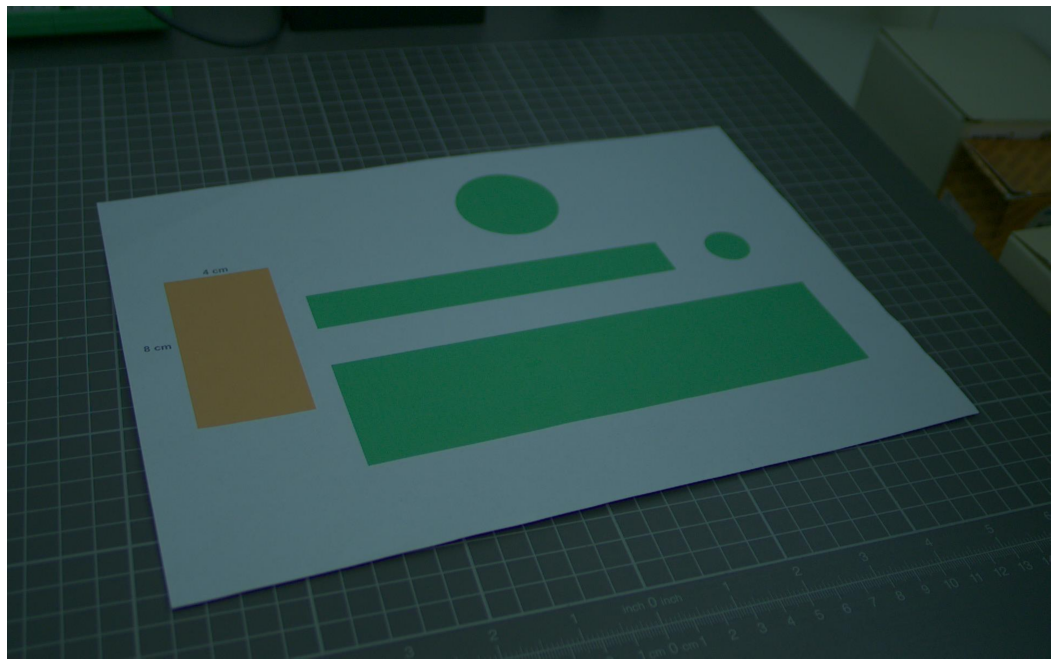

In [20]:
img = load_image('data/sklon.jpg') ###
plot_images(img)

In [23]:
show_images(img)

x = 302, y = 1104
x = 1787, y = 747
x = 1304, y = 223
x = 164, y = 359


**2) Vytvořte si dva seznamy korenspondečních bodů, které budou využity pro výpočet transformační matice H**

Získejte z obrazu souřadnice korespondenčních bodů a uložte je do prvního seznamu.
Druhý seznam musí obsahovat cílové souřadnice bodů, do kterých chceme vybrané body z prvního seznamu transformovat. 

Pozor, záleží na pořadí bodů a obě struktury musí být `np.array([..., ..., ..., ...])`.

In [44]:
src_pts = np.array([(303, 1108), (1788, 748), (1307, 221), (165, 362)]) # np.array of tuples

w, h = 297, 210
w *= 3
h *= 3
dst_pts = np.array([(0, h), (w, h), (w, 0), (0, 0)]) # np.array of tuples

**3) Pomocí funkce [`cv2.findHomography`](https://docs.opencv.org/3.4.1/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780) získejte transformační matici `H`. Matici vypiště, ať si připomenete její tvar.**

In [45]:
H, mask = cv2.findHomography(src_pts, dst_pts) ###

print(H)
print(mask)

[[0.787 -0.146 -77.132]
 [0.182 1.472 -562.855]
 [-0.000 0.001 1.000]]
[[1]
 [1]
 [1]
 [1]]


**4) Využijte [`cv2.warpPerspective`](https://docs.opencv.org/3.4.1/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87), která přijímá transformační matici `H`, k narovnání zdrojového obrazu. Výsledek zobrazte.** 

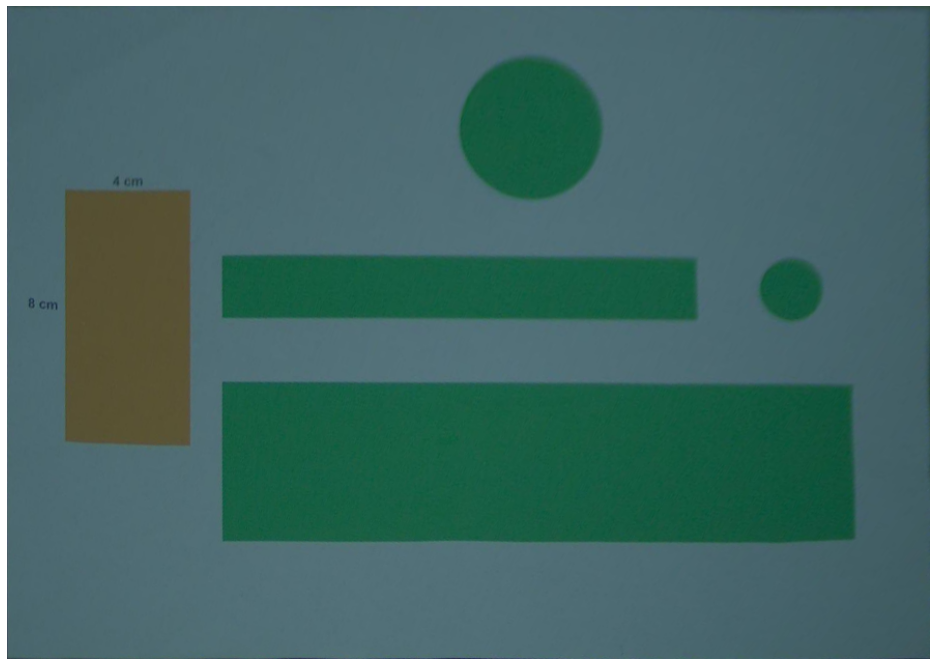

In [46]:
warped_img = cv2.warpPerspective(img, H, (w, h)) ###

plot_images(warped_img)

In [39]:
show_images(img)

**5) Z netransformovaného snímku získejte souřadnice hraničních bodů úsečky `d` a uložte je do definovaných proměnných.** 

Nelekejte se zběsilého předepsaného formátu, OpenCV bohužel občas požaduje zvláštní struktury. Souřadnice hraničních bodů úsečky získejte stejně jako u 2)

In [47]:
line_start = np.array([[(569, 739)]], dtype='float32') # tuple
line_end = np.array([[(1232, 484)]], dtype='float32') # tuple

**6) Využijte [`cv2.perspectiveTransform`](https://docs.opencv.org/3.4.1/d2/de8/group__core__array.html#gad327659ac03e5fd6894b90025e6900a7) k transformaci zdrojových bodů do nového prostoru a vypočítejte reálnou vzdálenost, kterou vypište.**

In [49]:
line_start_t = cv2.perspectiveTransform(line_start, H) ###
line_end_t = cv2.perspectiveTransform(line_end, H) ###

dist = np.linalg.norm(line_start_t-line_end_t)/3 ###
# the units correspond to those from `cv2.findHomography`
print(f'D = {dist / 10:.02f} cm') # change if needed

D = 16.81 cm
